## Project 3


The main objective of this project is to understand how the cases of covid-19 are progressing within each region individually and then on a global scale as a whole.

The aim is to:
-Analyze the progression of COVID-19 cases and deaths at the county and national levels in the US.
-Identify regions with rapid case increases, high slopes of cases per time, and windows of peak fatalities.
=Gain insights into the pandemic's spread and inform strategies like lockdown planning.

*Data description*

The datasets used in this project are time_series_covid19_confirmed_US.csv and time_series_covid19_deaths_US.csv.



**The *columns* in the dataset are:**


1.UID: Unique identifier

2.iso2, iso3, code3: Country codes

3.FIPS: Federal Information Processing Standard code

4.Admin2: County-level administrative unit

5.Province_State: State or province

6.Country_Region: Country

7.Latitude, Longitude: Geographic coordinates

8.Combined_Key: Unique identifier combining location and date

9.Time series data: Daily counts of confirmed cases or deaths








In [ ]:
#Import libraries (pandas, numpy, matplotlib, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
covid19_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')
covid19_deaths = pd.read_csv('/content/time_series_covid19_deaths_US.csv')

# Data cleaning

Checking if there are any missing data

In [ ]:
#Check for Missing Values

print("Missing Values:\n", covid19_confirmed.isnull().sum())

print("Missing Values:\n", covid19_deaths.isnull().sum())

Missing Values:
 UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1154, dtype: int64
Missing Values:
 UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1155, dtype: int64


In [ ]:
#Check for Duplicate Rows
c19confirmed = covid19_confirmed.drop_duplicates()
print("Number of duplicate rows:", c19confirmed.duplicated().sum())

#Check for Duplicate Rows
c19deaths = covid19_deaths.drop_duplicates()
print("Number of duplicate rows:", c19deaths.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows: 0


**THE ARE NO DUPLICATE ROWS**

In [ ]:
# Print the cleaned DataFrame
print( "This is covid 19 confirmed casses")
print(c19confirmed)

print("This is covid 19 deaths casses")
print(c19deaths)

This is covid 19 confirmed casses
           UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.64

**Data description**

In [ ]:
#Descriptive statistics
print("Basic Descriptive Statistics:Covid 19 confirmed cases")
print(c19confirmed.describe())

Basic Descriptive Statistics:Covid 19 confirmed cases
                UID        code3          FIPS          Lat        Long_  \
count  3.342000e+03  3342.000000   3332.000000  3342.000000  3342.000000   
mean   8.342992e+07   834.494913  33043.078932    36.721617   -88.642045   
std    4.314076e+06    36.487378  18648.808931     9.079322    21.776287   
min    1.600000e+01    16.000000     60.000000   -14.271000  -174.159600   
25%    8.401811e+07   840.000000  19076.500000    33.896803   -97.803595   
50%    8.402921e+07   840.000000  31012.000000    38.005610   -89.488865   
75%    8.404612e+07   840.000000  47129.500000    41.579255   -82.313398   
max    8.410000e+07   850.000000  99999.000000    69.314792   145.673900   

           1/22/20      1/23/20      1/24/20      1/25/20      1/26/20  ...  \
count  3342.000000  3342.000000  3342.000000  3342.000000  3342.000000  ...   
mean      0.000299     0.000299     0.000598     0.000598     0.001496  ...   
std       0.017298     0

In [ ]:
print(c19deaths['Population'].describe())

count    3.342000e+03
mean     9.960357e+04
std      3.241661e+05
min      0.000000e+00
25%      9.917250e+03
50%      2.489150e+04
75%      6.497525e+04
max      1.003911e+07
Name: Population, dtype: float64


The mean latitude (36.72) and longitude (-88.64) place the data's center roughly in the central-southern United States.
The standard deviation of latitude (9.08) and longitude (21.78) show a wide spread of data points across the US.
The mean, 25%, and 50% are mostly 0 in the early days. This indicates that the virus was just starting, and most locations had no reported cases.
The std (standard deviation) also increases, which means the spread of cases across different locations became more varied. Some areas were hit much harder than others.
There's a clear upward trend in confirmed cases from the beginning of 2020 to early 2023.The descriptive statistics show a pandemic that started slowly, then rapidly increased, and had a highly variable impact across different regions.





In [ ]:
#Descriptive statistics
print("Basic Descriptive Statistics:Covid 19 confirmed cases")
print(c19deaths.describe())

Basic Descriptive Statistics:Covid 19 confirmed cases
                UID        code3          FIPS          Lat        Long_  \
count  3.342000e+03  3342.000000   3332.000000  3342.000000  3342.000000   
mean   8.342992e+07   834.494913  33043.078932    36.721617   -88.642045   
std    4.314076e+06    36.487378  18648.808931     9.079322    21.776287   
min    1.600000e+01    16.000000     60.000000   -14.271000  -174.159600   
25%    8.401811e+07   840.000000  19076.500000    33.896803   -97.803595   
50%    8.402921e+07   840.000000  31012.000000    38.005610   -89.488865   
75%    8.404612e+07   840.000000  47129.500000    41.579255   -82.313398   
max    8.410000e+07   850.000000  99999.000000    69.314792   145.673900   

         Population      1/22/20      1/23/20      1/24/20      1/25/20  ...  \
count  3.342000e+03  3342.000000  3342.000000  3342.000000  3342.000000  ...   
mean   9.960357e+04     0.000299     0.000299     0.000299     0.000299  ...   
std    3.241661e+05  

Death rates lagged behind confirmed case rates, as expected.Similar to the confirmed cases, the mean, 25%, and 50% are mostly 0. This indicates minimal deaths reported in most locations during the early stages of the pandemic.The std also increases, showing a growing disparity in death counts across regions.The death data's latitude and longitude distribution mirrors the confirmed cases data, suggesting that the same areas were heavily impacted by both cases and deaths.
The 25 and 50 percentile values are very low, compared to the 75 percentile and max values. This shows that the majority of the locations, had a much lower death count, than the few locations with high death counts.
The death statistics reveal a pattern of concentrated fatalities in specific regions, highlighting the need for targeted public health interventions. The high variability in death counts underscores the importance of considering regional factors when analyzing the pandemic's impact.

# Explatory data analysis

<ipython-input-7-0fe0410bee8b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  national_cases.index = pd.to_datetime(national_cases.index)


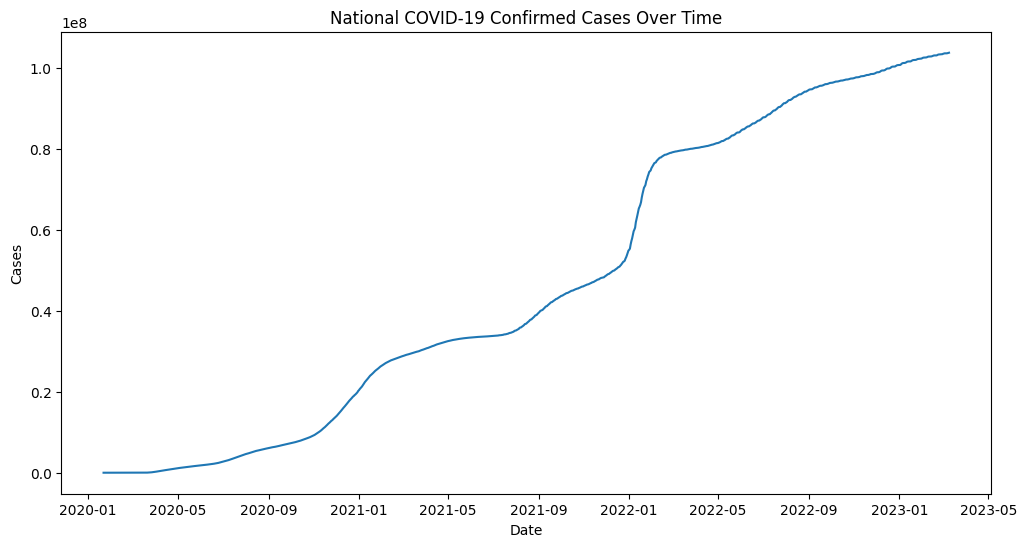

In [ ]:
#1. Time Series Plot of National Cases
def plot_national_cases(c19confirmed):
    national_cases = c19confirmed.iloc[:, 11:].sum()
    national_cases.index = pd.to_datetime(national_cases.index)
    plt.figure(figsize=(12, 6))
    plt.plot(national_cases)
    plt.title('National COVID-19 Confirmed Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()

    # Use c19confirmed
plot_national_cases(c19confirmed)

Overall, the number of Covid 19 confirmed cases increased from 2020 to 2023. Jan 2022 to March 2022 is where we see the largest increase in the number of confirmed cases. We see another steep increase in Jan 2021 to March 2021. The number of cases were still generally low in the first 6 months of 2020. The significant rises in cases in these particular times could be due to a new Covid 19 variant which is could also be an appropriate time to initiate lockdown.


<ipython-input-8-21c5f152192b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  national_cases.index = pd.to_datetime(national_cases.index)


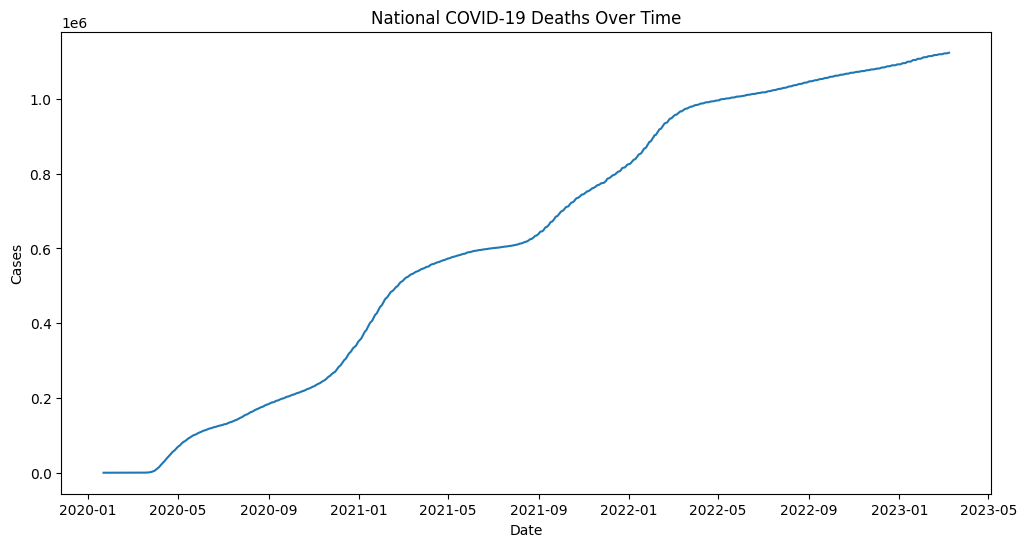

In [ ]:
#2. Time Series Plot of National Cases
def plot_national_cases(c19deaths):
    national_cases = c19deaths.iloc[:, 12:].sum()
    national_cases.index = pd.to_datetime(national_cases.index)
    plt.figure(figsize=(12, 6))
    plt.plot(national_cases)
    plt.title('National COVID-19 Deaths Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()

    # Use c19confirmed
plot_national_cases(c19deaths)

There is a general increase in the amount of Covid 19 deaths over the years. There was a significant increase in May 2020, Jan 2021 to March 2021 January to May 2025.These significant increases show peak fatality times.


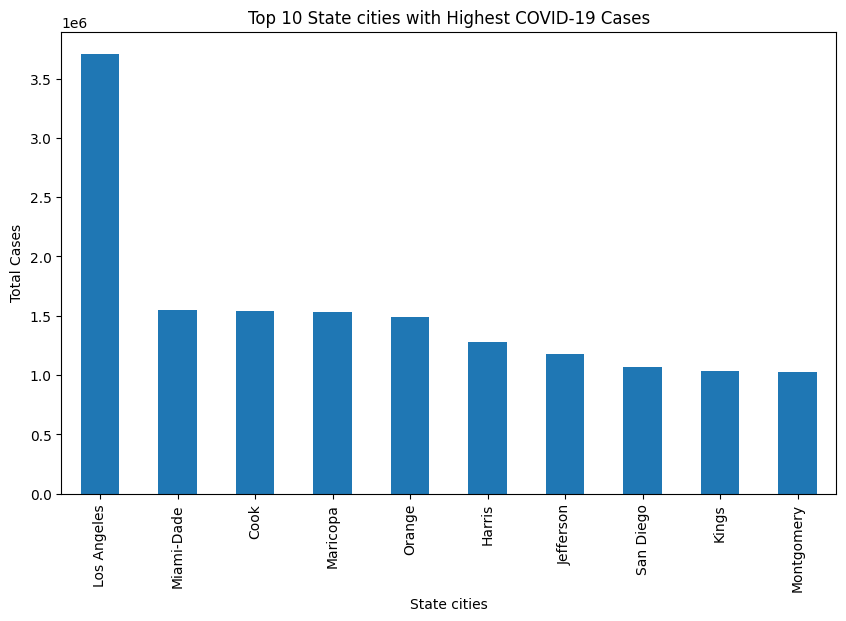

In [ ]:
# 3. Bar Plot of State with Highest Cases
def bar_top_counties(c19confirmed):
    county_totals = c19confirmed.groupby('Admin2').sum().iloc[:, -1].sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    county_totals.plot(kind='bar')
    plt.title('Top 10 State cities with Highest COVID-19 Cases')
    plt.xlabel('State cities')
    plt.ylabel('Total Cases')
    plt.show()

    # Use c19confirmed
bar_top_counties(c19confirmed)

Los Angeles is the city with the highest number followed by Manti-Dade than Cook. These are  states where most people had Covid 19 cases. This could be due to a large population in California or the type of popular activities that are popular. This will help to choose which state city to implement lockdown first.


Carlifonia is the city with the highest number followed by Texas than Florida. This is where most people had Covid 19 cases. This could be due to a large population in California or the type of popular activities that are popular. This will help to choose which state city to implement lockdown first.


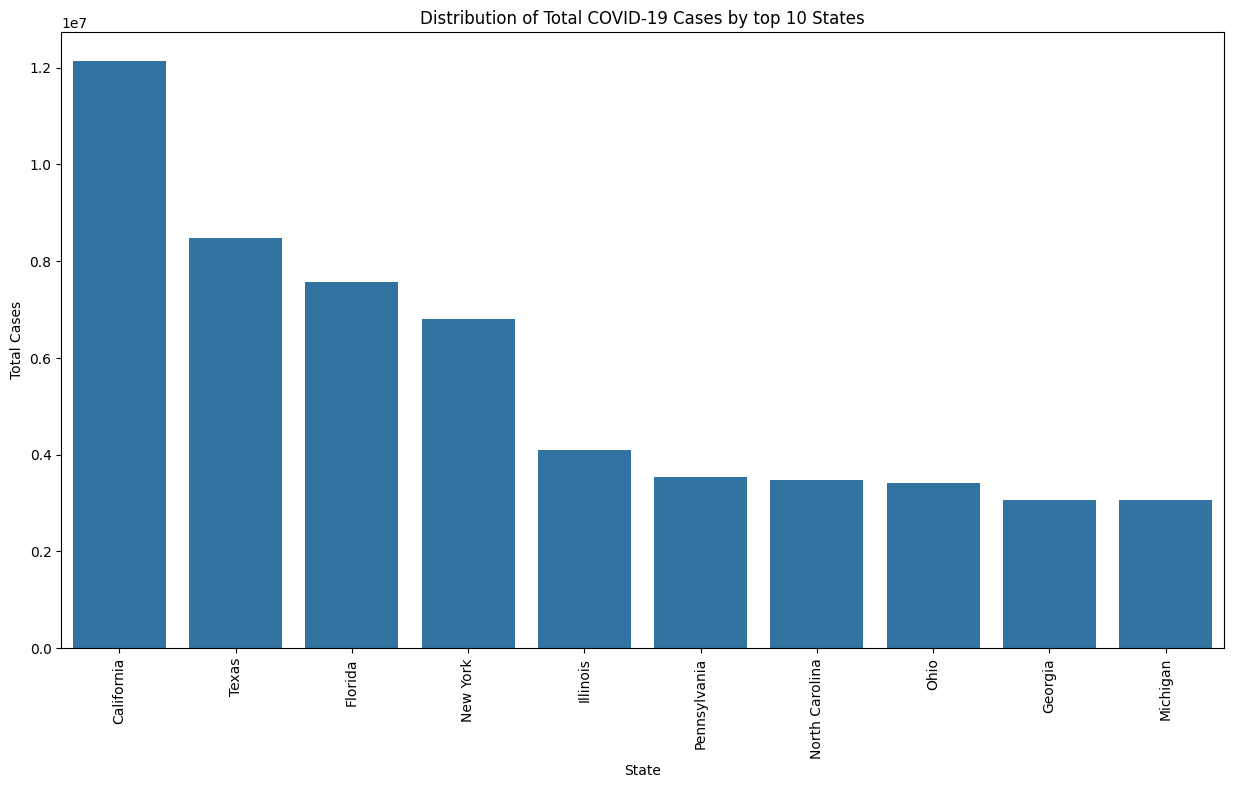

In [ ]:
# 4. Distribution of Cases by State (Box Plot)
def boxplot_cases_by_state(df):
    state_totals = df.groupby('Province_State').sum().iloc[:, -1].sort_values(ascending=False).head(10)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=state_totals.index, y=state_totals.values)
    plt.xticks(rotation=90)
    plt.title('Distribution of Total COVID-19 Cases by top 10 States')
    plt.ylabel('Total Cases')
    plt.xlabel('State')
    plt.show()

# Use c19confirmed
boxplot_cases_by_state(c19confirmed)


Carlifonia is the city with the highest number followed by Texas than Florida. This is where most people had Covid 19 cases. This could be due to a large population in California or the type of popular activities that are popular. This will help to choose which state city to implement lockdown first.

<ipython-input-11-67b2e378f847>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_change.index = pd.to_datetime(daily_change.index)


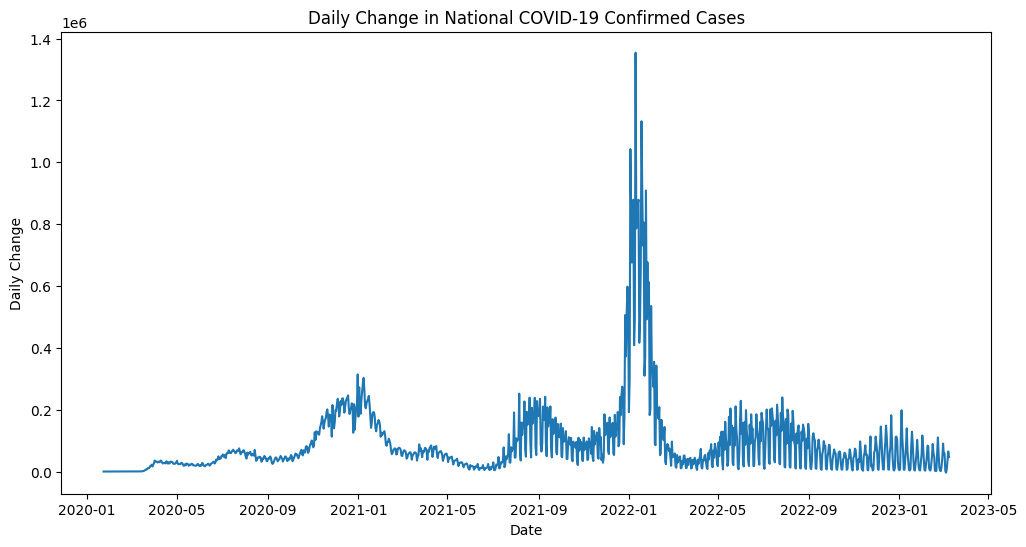

In [ ]:
# 5. Daily Change in National Cases
def plot_daily_change(c19confirmed):
    national_cases = c19confirmed.iloc[:, 11:].sum()
    daily_change = national_cases.diff()
    daily_change.index = pd.to_datetime(daily_change.index)
    plt.figure(figsize=(12, 6))
    plt.plot(daily_change)
    plt.title('Daily Change in National COVID-19 Confirmed Cases')
    plt.xlabel('Date')
    plt.ylabel('Daily Change')
    plt.show()

# Use c19confirmed
plot_daily_change(c19confirmed)

Daily change refers to how much the total number went up or down from one day to the next. For the first 9 months of 2020 the daily change in confirmed cases was low. There were different peaks in confirmed cases in January 2021, September 2021, January 2022 which was the highest peak of cases , June 2022 and January 2023. These peaks could represent when there new Covid 19 variants which would also be the best time to have a lockdown.  


<ipython-input-12-c6ffd37d04b2>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_change.index = pd.to_datetime(daily_change.index)


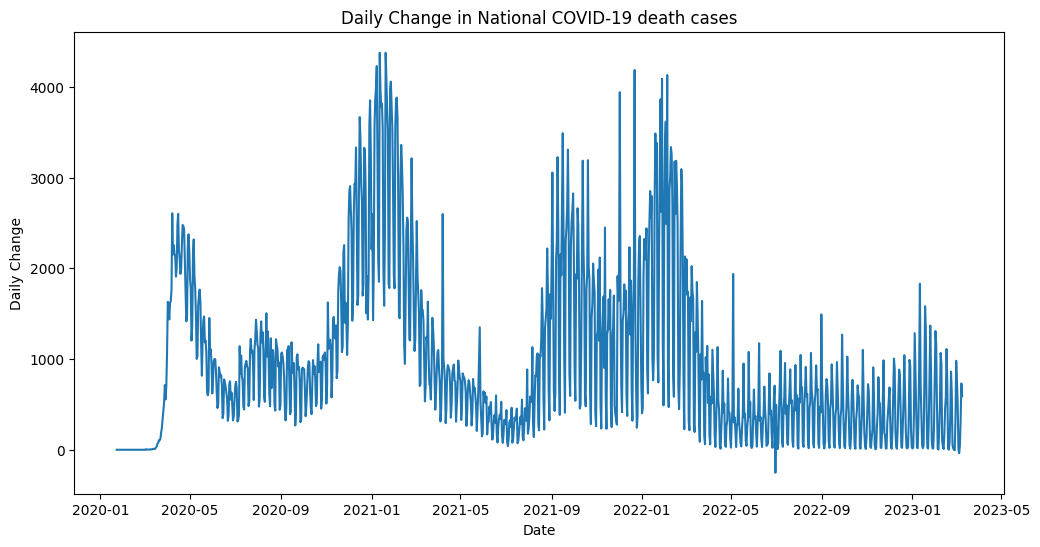

In [ ]:
 #6. Daily Change in National Cases
def plot_daily_change(c19deaths):
    national_cases = c19deaths.iloc[:, 12:].sum()
    daily_change = national_cases.diff()
    daily_change.index = pd.to_datetime(daily_change.index)
    plt.figure(figsize=(12, 6))
    plt.plot(daily_change)
    plt.title('Daily Change in National COVID-19 death cases')
    plt.xlabel('Date')
    plt.ylabel('Daily Change')
    plt.show()

# Use c19confirmed
plot_daily_change(c19deaths)

Daily change refers to how much the total number went up or down from one day to the next. It's the difference between each day's total and the previous day's total.The highest number of daily increase of 4000 in Covid 19 deaths is seen in the period of January 2022 to March 2022. Generally from May 2022 to May 2023 very low death daily changes. There are other times when the death daily changes peaked which are Jan 2021 Sep 2021 and June 2022 - July 2022 and Jan 2023.

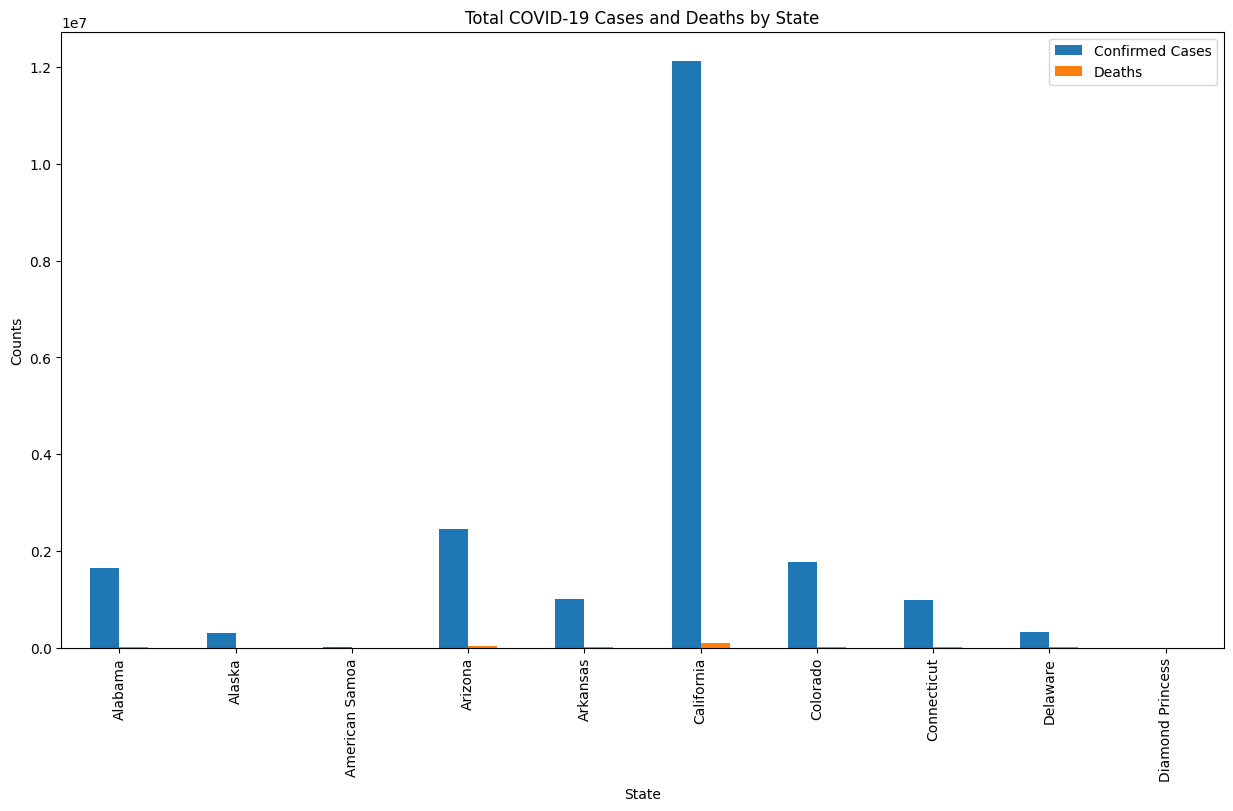

In [ ]:
# 6. Comparison of State-Level Trends
def bar_state_comparison(c19confirmed, c19deaths):
    confirmed_state = c19confirmed.groupby('Province_State').sum().iloc[:, -1].head(10)
    deaths_state = c19deaths.groupby('Province_State').sum().iloc[:, -2].head(10) #Excluding the Population column.
    state_comparison = pd.DataFrame({'Confirmed Cases': confirmed_state, 'Deaths': deaths_state})
    state_comparison.plot(kind='bar', figsize=(15, 8))
    plt.title('Total COVID-19 Cases and Deaths by State')
    plt.xlabel('State')
    plt.ylabel('Counts')
    plt.show()

bar_state_comparison(c19confirmed, c19deaths)

In terms of Covid19 confirmed cases California which is a US state had the highest count. The cases are significantly higher than all the other states. Overall the death count was very low for all the states however the California state had the highest death count. The confirmed cases for Carlifonia are significantly higher than the number of deaths.



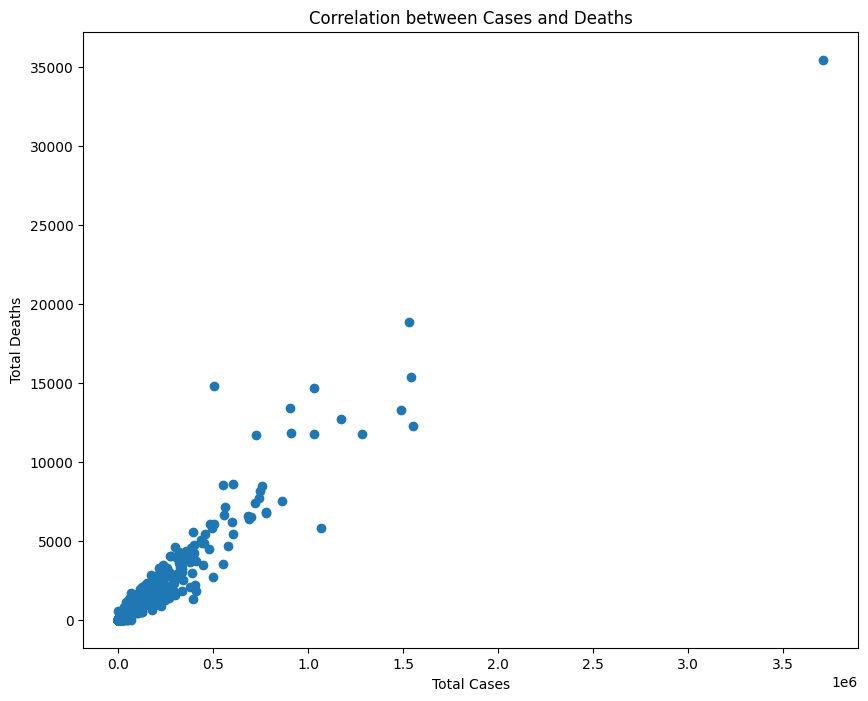

In [ ]:
# 7. Spatial Correlation
def scatter_cases_deaths(c19confirmed, c19deaths):
    confirmed_county = c19confirmed.groupby('Admin2').sum().iloc[:, -1].reset_index()
    deaths_county = c19deaths.groupby('Admin2').sum().iloc[:, -2].reset_index() #Excluding the Population column.
    merged_data = pd.merge(confirmed_county, deaths_county, on=['Admin2'], suffixes=('_confirmed', '_deaths'))

    plt.figure(figsize=(10, 8))
    plt.scatter(merged_data.iloc[:, 1], merged_data.iloc[:, 2])
    plt.title('Correlation between Cases and Deaths')
    plt.xlabel('Total Cases')
    plt.ylabel('Total Deaths')
    plt.show()

scatter_cases_deaths(c19confirmed, c19deaths)

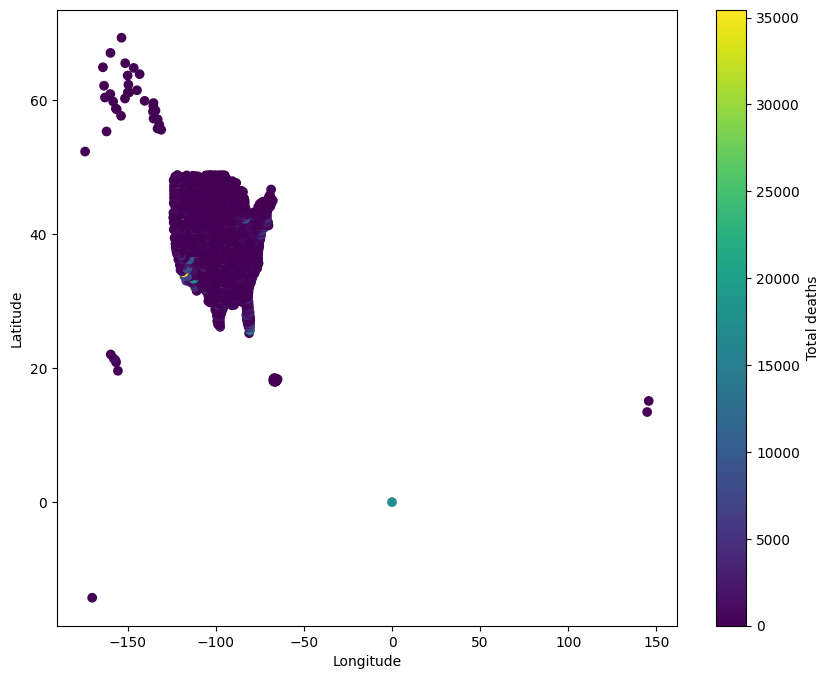

In [ ]:

# 8. Cases and Deaths by Latitude and Longitude
def scatter_lat_lon_cases_deaths(c19confirmed, c19deaths):
    cases_sum = c19confirmed.groupby(['Lat','Long_']).sum().iloc[:,-1].reset_index()
    death_sum = c19deaths.groupby(['Lat','Long_']).sum().iloc[:,-2].reset_index() #Excluding the Population column.
    merged_data = pd.merge(cases_sum, death_sum, on = ['Lat','Long_'], suffixes = ('_cases','_deaths'))
    plt.figure(figsize=(10,8))
    plt.scatter(x = merged_data['Long_'], y = merged_data['Lat'], c=merged_data.iloc[:,-1], cmap = 'viridis')
    plt.colorbar(label ='Total deaths')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

scatter_lat_lon_cases_deaths(c19confirmed, c19deaths)



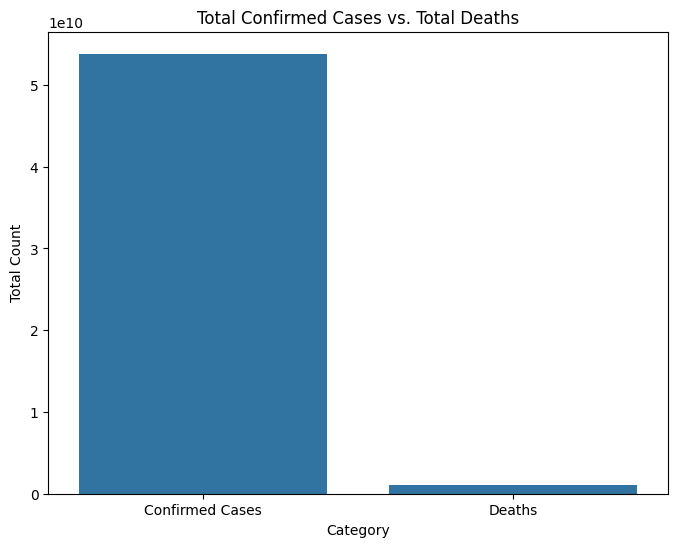

In [ ]:
#9.What is the total overall count of Covid 19 confirmed cases and total deaths? Are there more cases than death?
def count_plot_cases_deaths(c19confirmed, c19deaths):
    """
    Generates a count plot (bar plot) of total confirmed cases and total deaths.

    Args:
        df_confirmed (pd.DataFrame): DataFrame containing confirmed cases data.
        df_deaths (pd.DataFrame): DataFrame containing deaths data.
    """

    total_confirmed = c19confirmed.iloc[:, 11:].sum().sum()  # Sum all confirmed cases
    total_deaths = c19deaths.iloc[:, 11:-1].sum().sum()  # Sum all deaths, excluding 'Population'

    data = pd.DataFrame({'Category': ['Confirmed Cases', 'Deaths'], 'Count': [total_confirmed, total_deaths]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Count', data=data)
    plt.title('Total Confirmed Cases vs. Total Deaths')
    plt.ylabel('Total Count')
    plt.show()

# Example usage (assuming c19confirmed and c19deaths are your DataFrames):
count_plot_cases_deaths(c19confirmed, c19deaths)

Overall there was a higher count of confirmed cases than deaths in the Us. This means that most people who had Covid 19 disease did not die. Due to the low death rate it may have not been necessary to have a lockdown but still continue with strict measures like social distancing to slow down the spread of the disease.


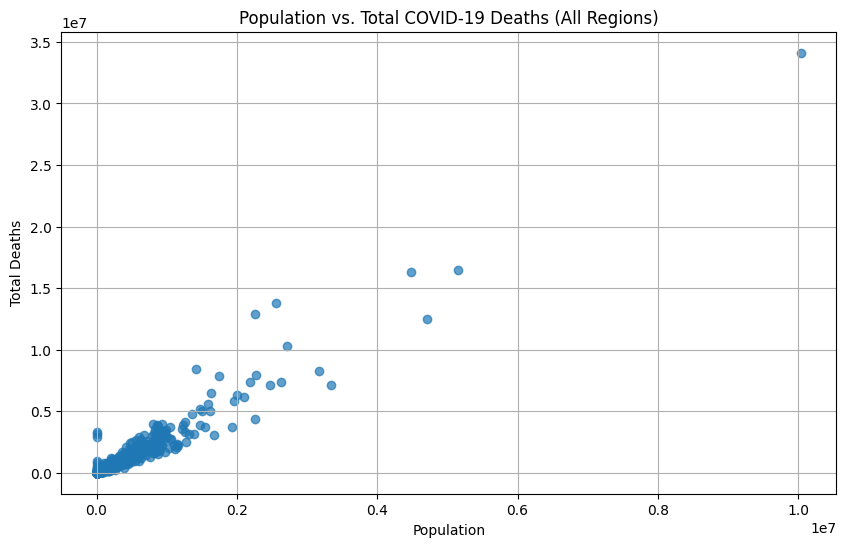

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def population_vs_deaths_scatter(c19deaths, county_name=None):
    """
    Generates a scatter plot comparing population vs. total deaths for COVID-19.

    Args:
        df_deaths (pd.DataFrame): DataFrame containing COVID-19 deaths data.
        county_name (str, optional): Name of a specific county to focus on. If None, uses all data.
    """

    if county_name:
        # Filter for a specific county
        county_data = c19deaths[c19deaths['Admin2'] == county_name]
        total_deaths = county_data.iloc[:, 11:-1].sum(axis=1)  #Sum all death columns
        population = county_data['Population']

        plt.figure(figsize=(10, 6))
        plt.scatter(population, total_deaths, alpha=0.7)
        plt.title(f'Population vs. Total COVID-19 Deaths ({county_name})')
        plt.xlabel('Population')
        plt.ylabel('Total Deaths')
        plt.grid(True)
        plt.show()

    else:
        # Use all data
        total_deaths = c19deaths.iloc[:, 11:-1].sum(axis=1) #Sum all death columns
        population = c19deaths['Population']

        plt.figure(figsize=(10, 6))
        plt.scatter(population, total_deaths, alpha=0.7)
        plt.title('Population vs. Total COVID-19 Deaths (All Regions)')
        plt.xlabel('Population')
        plt.ylabel('Total Deaths')
        plt.grid(True)
        plt.show()

# Example usage (assuming c19deaths is your DataFrame):
#population_vs_deaths_scatter(c19deaths, Province_State='California') #For a specific county
population_vs_deaths_scatter(c19deaths) #For all data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def population_vs_country_region(c19deaths):
    """
    Generates a bar plot comparing population vs. country/region for COVID-19 deaths.

    Args:
        df_deaths (pd.DataFrame): DataFrame containing COVID-19 deaths data.
    """

    # Find the column that contains country/region information
    country_region_column = None
    for col in c19deaths.columns:
        if 'Country' in col or 'Region' in col:
            country_region_column = col
            break

    if country_region_column is None:
        print("Error: Could not find a column containing country/region information.")
        return

    # Group by the found country/region column and sum the population and deaths
    country_data = c19deaths.groupby(country_region_column).agg({
        'Population': 'sum',
        c19deaths.columns[11:-1].tolist()[0]: 'sum' #sum the first death column to represent deaths.
    }).reset_index()

    # Rename the death column for clarity
    death_column_name = c19deaths.columns[11:-1].tolist()[0]
    country_data = country_data.rename(columns={death_column_name: 'Total_Deaths'})

    # Sort by population for better visualization
    country_data = country_data.sort_values(by='Population', ascending=False).head(20) #shows only the top 20, to prevent overcrowding

    # Create the bar plot
    plt.figure(figsize=(16, 8))
    sns.barplot(x=country_region_column, y='Population', data=country_data, color='skyblue', label='Population')
    sns.barplot(x=country_region_column, y='Total_Deaths', data=country_data, color='salmon', label='Total Deaths')

    plt.title('Population vs. Total COVID-19 Deaths by Country/Region (Top 20)')
    plt.xlabel(country_region_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage (assuming c19deaths is your DataFrame):
population_vs_country_region(c19deaths)

KeyError: 'Population'

# **Machine learning model**

Assesing if the datasets of confirmed cases and deaths are stationarity

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationarity(time_series, alpha=0.05):
    """
    Performs the Augmented Dickey-Fuller test to check for stationarity.

    Args:
        time_series (pd.Series): The time series data.
        alpha (float, optional): Significance level (alpha). Defaults to 0.05.

    Returns:
        dict: A dictionary containing the test results.
    """

    result = adfuller(time_series)

    output = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Is Stationary': result[1] < alpha
    }

    print("Dickey-Fuller Test Results:")
    for key, value in output.items():
        print(f"{key}: {value}")

    return output

# Example Usage (replace with your time series data):
# Assuming 'c19confirmed' is your DataFrame
# and you want to check the national cases for stationarity

def get_national_time_series(c19confirmed):
    time_series = c19confirmed.iloc[:, 11:].sum()
    time_series.index = pd.to_datetime(time_series.index)
    return time_series

#get the national time series.
national_time_series = get_national_time_series(c19confirmed)

#Perform the dickey fuller test
stationarity_results = check_stationarity(national_time_series)

#If you want to check a county time series, here is an example.
def get_county_time_series(c19confirmed, county_name):
    time_series = c19confirmed[c19confirmed['Admin2'] == county_name].iloc[:, 11:].sum()
    time_series.index = pd.to_datetime(time_series.index)
    return time_series

#Example of a county time series.
#county_time_series = get_county_time_series(c19confirmed, 'New York')

#Perform the dickey fuller test for the county time series.
#county_stationarity_results = check_stationarity(county_time_series)

<ipython-input-45-da2859ed153d>:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)


DateParseError: Unknown datetime string format, unable to parse: Total_Cases, at position 1143

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np  # Import numpy to use np.float64

def check_stationarity(time_series, alpha=0.05):
    """
    Performs the Augmented Dickey-Fuller test to check for stationarity.

    Args:
        time_series (pd.Series): The time series data.
        alpha (float, optional): Significance level (alpha). Defaults to 0.05.

    Returns:
        dict: A dictionary containing the test results.
    """

    result = adfuller(time_series)

    output = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Is Stationary': result[1] < alpha
    }

    print("Dickey-Fuller Test Results:")
    for key, value in output.items():
        print(f"{key}: {value}")

    return output

def get_national_deaths_time_series(c19deaths):
    """
    Retrieves the national deaths time series from the c19deaths DataFrame.
    """
    time_series = c19deaths.iloc[:, 12:-1].sum()  # Exclude 'Population' column
    time_series.index = pd.to_datetime(time_series.index, errors='coerce') # added errors='coerce' to remove any non date values.
    time_series = time_series.dropna() #added this line to drop any NaN values.
    return time_series

def get_county_deaths_time_series(c19deaths, county_name):
    """
    Retrieves a county-specific deaths time series from the c19deaths DataFrame.
    """
    time_series = c19deaths[c19deaths['Admin2'] == county_name].iloc[:, 11:-1].sum()  # Exclude 'Population' column.
    time_series.index = pd.to_datetime(time_series.index, errors='coerce') # added errors='coerce' to remove any non date values.
    time_series = time_series.dropna() #added this line to drop any NaN values.
    return time_series

# National Deaths Time Series
national_deaths_time_series = get_national_deaths_time_series(c19deaths)

# Perform Dickey-Fuller test on national deaths
national_deaths_stationarity_results = check_stationarity(national_deaths_time_series)

# County Deaths Time Series (example: New York)
#county_deaths_time_series = get_county_deaths_time_series(c19deaths, 'New York')

# Perform Dickey-Fuller test on county deaths
#county_deaths_stationarity_results = check_stationarity(county_deaths_time_series)

Dickey-Fuller Test Results:
ADF Statistic: 1.3271245721264506
p-value: 0.9967565728064572
Critical Values: {'1%': np.float64(-3.4360840741163168), '5%': np.float64(-2.864071964072552), '10%': np.float64(-2.568118081861596)}
Is Stationary: False


<ipython-input-41-b2d2d41cac24>:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index, errors='coerce') # added errors='coerce' to remove any non date values.


 **RNN machine learnimg model **

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0678
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.6152e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9562e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1825e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2702e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3293e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3434e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6139e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4778e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.0640e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.6042e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3828e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.2268e-04
Epoch 15/50
29/29 ━━━━━

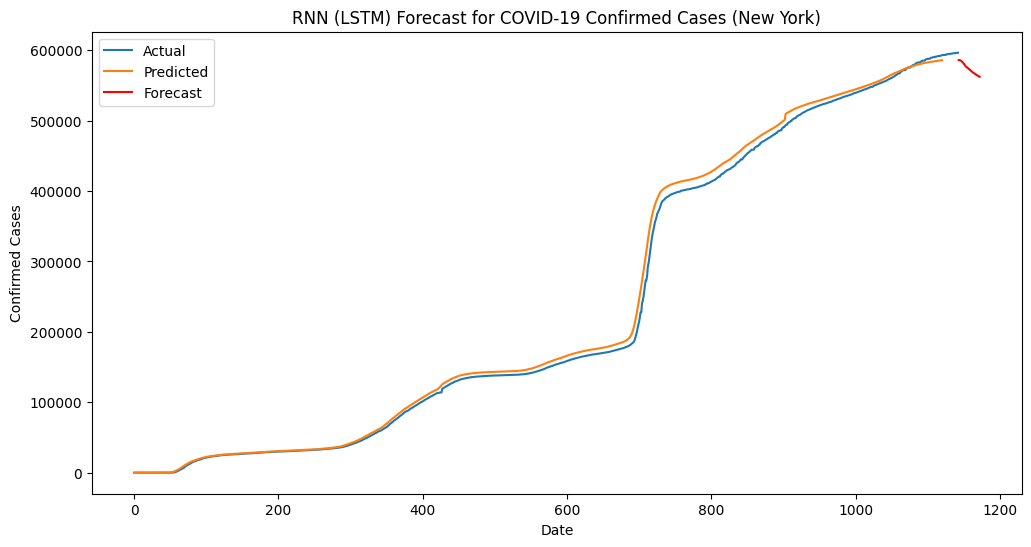

[[585936.75]
 [585864.56]
 [585561.  ]
 [585004.1 ]
 [584222.94]
 [583262.9 ]
 [582155.6 ]
 [580893.7 ]
 [579532.5 ]
 [578092.94]
 [576582.2 ]
 [575927.56]
 [575150.4 ]
 [574285.7 ]
 [573370.75]
 [572437.1 ]
 [571509.56]
 [570606.06]
 [569742.9 ]
 [568929.5 ]
 [568171.8 ]
 [567474.7 ]
 [566761.3 ]
 [566048.06]
 [565347.3 ]
 [564666.3 ]
 [564009.  ]
 [563376.  ]
 [562766.06]
 [562176.94]]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1030
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1626e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.1877e-05
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.5753e-05
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.7767e-05
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.0249e-05
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.7710e-05
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.2447e-05
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.4830e-05
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.4606e-05
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.0193e-05
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.1362e-05
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.0432e-05
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━

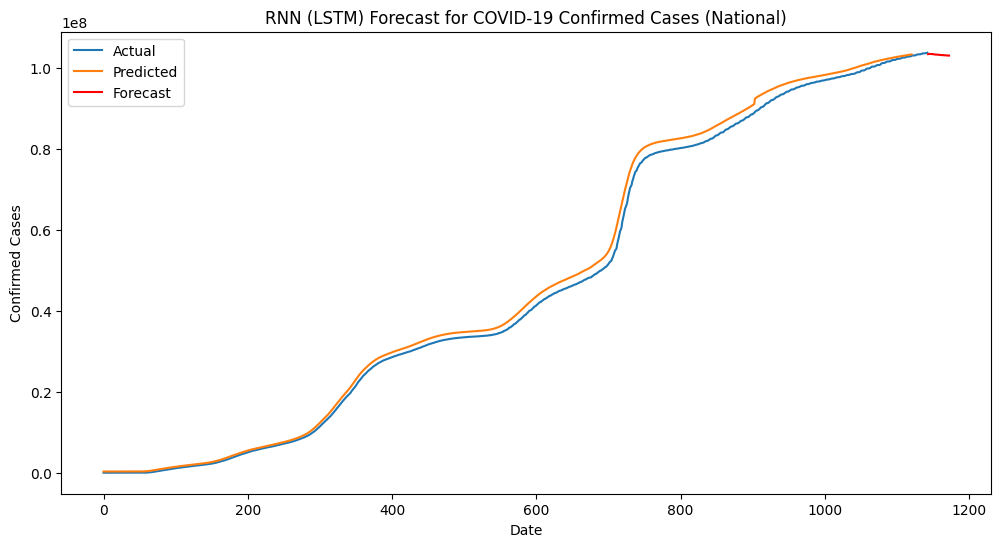

[[1.03451632e+08]
 [1.03479688e+08]
 [1.03493824e+08]
 [1.03497264e+08]
 [1.03489728e+08]
 [1.03478064e+08]
 [1.03463352e+08]
 [1.03444520e+08]
 [1.03419096e+08]
 [1.03384328e+08]
 [1.03343072e+08]
 [1.03340848e+08]
 [1.03332544e+08]
 [1.03319904e+08]
 [1.03304432e+08]
 [1.03287624e+08]
 [1.03270160e+08]
 [1.03252552e+08]
 [1.03235392e+08]
 [1.03219456e+08]
 [1.03205848e+08]
 [1.03195144e+08]
 [1.03182824e+08]
 [1.03169712e+08]
 [1.03156432e+08]
 [1.03143392e+08]
 [1.03130808e+08]
 [1.03118744e+08]
 [1.03107264e+08]
 [1.03096352e+08]]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

def create_dataset(dataset, time_step=1):
    """
    Creates a dataset suitable for RNN input.
    """
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

def rnn_forecast(c19confirmed, county_name=None, time_step=10, epochs=50, batch_size=32, days_to_forecast=30):
    """
    Generates RNN (LSTM) forecast for COVID-19 confirmed cases.
    """

    if county_name:
        time_series = c19confirmed[c19confirmed['Admin2'] == county_name].iloc[:, 11:].sum().values.reshape(-1, 1)
    else:
        time_series = c19confirmed.iloc[:, 11:].sum().values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(time_series)

    # Train-test split
    train_size = int(len(scaled_data) * 0.8)
    train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

    # Create datasets
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create LSTM model
    model = keras.Sequential()
    model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(keras.layers.LSTM(50, return_sequences=True))
    model.add(keras.layers.LSTM(50))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform([[y] for y in y_train])
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform([[y] for y in y_test])

    # Forecast for future days
    last_val = scaled_data[-time_step:].reshape(1, time_step, 1)
    forecast_list = []
    for _ in range(days_to_forecast):
        pred = model.predict(last_val)
        forecast_list.append(pred[0, 0])
        last_val = np.append(last_val[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

    forecast_scaled = np.array(forecast_list).reshape(-1, 1)
    forecast_final = scaler.inverse_transform(forecast_scaled)

    # Evaluate using MAPE
    if len(y_test) > 0 :
        mape = mean_absolute_percentage_error(y_test, test_predict)
        print(f"MAPE on Test Set: {mape:.2f}%")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
    plt.plot(np.concatenate((train_predict, test_predict)), label='Predicted')
    plt.plot(np.arange(len(scaled_data), len(scaled_data) + days_to_forecast), forecast_final, label='Forecast', color='red')
    plt.title(f'RNN (LSTM) Forecast for COVID-19 Confirmed Cases ({county_name if county_name else "National"})')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.show()

    return forecast_final

# Example usage:
forecast = rnn_forecast(c19confirmed, county_name='New York', days_to_forecast=30)
print(forecast)
# National Forecast
forecast_national = rnn_forecast(c19confirmed, days_to_forecast=30)
print(forecast_national)


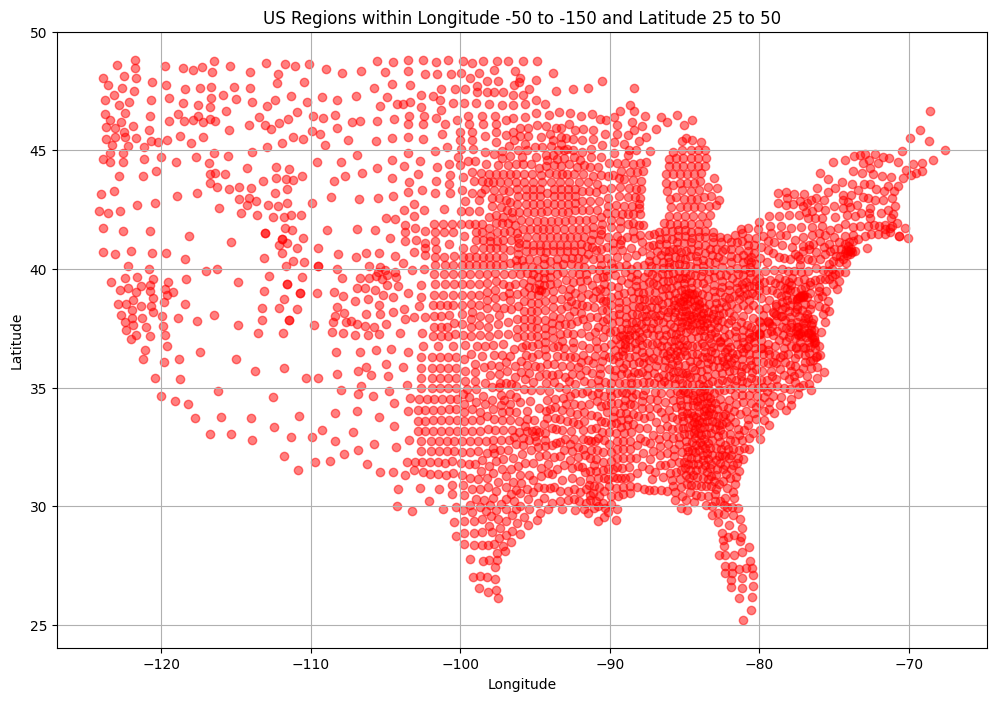

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_us_regions_no_map(c19confirmed):
    """
    Visualizes US regions within longitude -50 to -150 and latitude 25 to 50, without a US map.
    """

    # Filter the DataFrame for the specified longitude and latitude range
    filtered_df = c19confirmed[
        (c19confirmed['Long_'] >= -150) & (c19confirmed['Long_'] <= -50) &
        (c19confirmed['Lat'] >= 25) & (c19confirmed['Lat'] <= 50)
    ]

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(filtered_df['Long_'], filtered_df['Lat'], color='red', alpha=0.5)

    plt.title('US Regions within Longitude -50 to -150 and Latitude 25 to 50')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Example usage (assuming c19confirmed is your DataFrame):
visualize_us_regions_no_map(c19confirmed)

# Inferential statistics

**The Mann-Kendall test was used to identify if there a statistically significant trend in the daily COVID-19 death counts over time**

Null Hypothesis (H0): There is no statistically significant trend in daily COVID-19 death counts over time.

Alternative Hypothesis (H1): There is a statistically significant trend in daily COVID-19 death counts over time.

In [ ]:
import pandas as pd
from scipy import stats
import scipy
import numpy as np

def mann_kendall_test(time_series):
    """
    Performs the Mann-Kendall trend test on a time series.

    Args:
        time_series (pd.Series or list): The time series data.

    Returns:
        tuple: (Mann-Kendall statistic, p-value)
    """

    if scipy.__version__ >= '1.9.0':
        mk_statistic, mk_pvalue = stats.mannkendall(time_series)
        return mk_statistic, mk_pvalue
    else:
        # Alternative implementation for older SciPy versions
        n = len(time_series)
        s = 0
        for i in range(n - 1):
            for j in range(i + 1, n):
                s += np.sign(time_series[j] - time_series[i])

        var_s = (n * (n - 1) * (2 * n + 5)) / 18
        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        return s, p_value

def mann_kendall_analysis(c19deaths):
    death_columns = [col for col in c19deaths.columns if '/' in col and '20' in col or '21' in col or '22' in col or '23' in col]
    daily_deaths = c19deaths[death_columns].sum()
    daily_deaths.index = pd.to_datetime(daily_deaths.index)
    mk_statistic, mk_pvalue = mann_kendall_test(daily_deaths)

    print(f"Mann-Kendall Statistic: {mk_statistic}")
    print(f"p-value: {mk_pvalue}")

    if mk_pvalue < 0.05:
        print("There is a statistically significant trend in the daily death counts.")
    else:
        print("There is no statistically significant trend in the daily death counts.")

# Example usage
mann_kendall_analysis(c19deaths)

<ipython-input-30-9cf884a3b768>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_deaths.index = pd.to_datetime(daily_deaths.index)
<ipython-input-30-9cf884a3b768>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s += np.sign(time_series[j] - time_series[i])


Mann-Kendall Statistic: 651939
p-value: 0.0
There is a statistically significant trend in the daily death counts.


This indicates that there is a consistent pattern of increase or decrease in the daily death counts over the period of time analyzed. A positive Mann-Kendall statistic indicates an increasing trend in the daily COVID-19 death counts over time. This result strongly suggests that, overall, the daily death counts increased over the time period examined.
This could be due to various factors, such as waves of new COVID-19 variants, changes in public health policie, seasonal effects and the impact of vaccination rates over time.



**Question: Does the daily change in confirmed cases have a statistically significant seasonal pattern?**

**Null Hypothesis (H0):** The daily change in confirmed cases has no statistically significant seasonal pattern.

**Alternative Hypothesis (H1):** The daily change in confirmed cases has a statistically significant seasonal pattern.

In [ ]:
import pandas as pd
from scipy import stats
import scipy
import numpy as np

def mann_kendall_test(time_series):
    """
    Performs the Mann-Kendall trend test on a time series.

    Args:
        time_series (pd.Series or list): The time series data.

    Returns:
        tuple: (Mann-Kendall statistic, p-value)
    """

    if scipy.__version__ >= '1.9.0':
        mk_statistic, mk_pvalue = stats.mannkendall(time_series)
        return mk_statistic, mk_pvalue
    else:
        # Alternative implementation for older SciPy versions
        n = len(time_series)
        s = 0
        for i in range(n - 1):
            for j in range(i + 1, n):
                s += np.sign(time_series[j] - time_series[i])

        var_s = (n * (n - 1) * (2 * n + 5)) / 18
        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        return s, p_value

def mann_kendall_analysis_cases(c19cases):
    """Performs Mann-Kendall analysis on confirmed COVID-19 cases."""
    case_columns = [col for col in c19cases.columns if '/' in col and '20' in col or '21' in col or '22' in col or '23' in col]
    daily_cases = c19cases[case_columns].sum()
    daily_cases.index = pd.to_datetime(daily_cases.index)
    mk_statistic, mk_pvalue = mann_kendall_test(daily_cases)

    print(f"Mann-Kendall Statistic (Cases): {mk_statistic}")
    print(f"p-value (Cases): {mk_pvalue}")

    if mk_pvalue < 0.05:
        print("There is a statistically significant trend in the daily confirmed cases.")
    else:
        print("There is no statistically significant trend in the daily confirmed cases.")

# Example usage (assuming c19confirmed is your DataFrame):
mann_kendall_analysis_cases(c19confirmed)

<ipython-input-31-e2f8e4f3cdd3>:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_cases.index = pd.to_datetime(daily_cases.index)
<ipython-input-31-e2f8e4f3cdd3>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s += np.sign(time_series[j] - time_series[i])


Mann-Kendall Statistic (Cases): 652602
p-value (Cases): 0.0
There is a statistically significant trend in the daily confirmed cases.


Therefore, we can confidently conclude that there is a statistically significant trend in the daily confirmed COVID-19 cases.A positive Mann-Kendall statistic (652602 in this case) indicates an increasing trend.
The very large number, indicates a very strong increasing trend.This trend could be due to several factors, such as the emergence of new, more transmissible variant, changes in testing capacity or reporting practices, relaxation of public health measures and seasonal variations in virus transmission.

**Relationship between death rates and regions**

In [ ]:
import pandas as pd
from scipy import stats

def analyze_death_rates_population_density(c19deaths, population_threshold):
    """
    Analyzes the difference in mean COVID-19 death rates between densely and sparsely populated regions.

    Args:
        df_deaths (pd.DataFrame): DataFrame containing COVID-19 deaths data.
        population_threshold (int): Threshold to define densely populated regions.
    """

    # Calculate total deaths for each region
    death_columns = [col for col in c19deaths.columns if '/' in col and '20' in col or '21' in col or '22' in col or '23' in col]
    c19deaths['Total_Deaths'] = c19deaths[death_columns].sum(axis=1)

    # Calculate death rates (deaths per population)
    c19deaths['Death_Rate'] = c19deaths['Total_Deaths'] / c19deaths['Population']

    # Separate densely and sparsely populated regions
    dense_regions = c19deaths[c19deaths['Population'] >= population_threshold]['Death_Rate'].dropna()
    sparse_regions = c19deaths[c19deaths['Population'] < population_threshold]['Death_Rate'].dropna()

    # Perform independent t-test (or Mann-Whitney U test)
    # Check for normality for t-test assumptions.
    stat_norm_dense, p_norm_dense = stats.shapiro(dense_regions)
    stat_norm_sparse, p_norm_sparse = stats.shapiro(sparse_regions)

    if p_norm_dense > 0.05 and p_norm_sparse > 0.05: # if data is normally distributed, use t-test
        t_statistic, p_value = stats.ttest_ind(dense_regions, sparse_regions, equal_var=False) #equal_var=False, as we do not assume equal variance.
        test_type = "t-test"
    else: # if data is not normally distributed, use Mann-Whitney U test.
        u_statistic, p_value = stats.mannwhitneyu(dense_regions, sparse_regions)
        test_type = "Mann-Whitney U test"

    print(f"Test used: {test_type}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("There is a statistically significant difference in mean death rates between densely and sparsely populated regions.")
    else:
        print("There is no statistically significant difference in mean death rates between densely and sparsely populated regions.")

    print(f"Mean Death Rate (Dense): {dense_regions.mean()}")
    print(f"Mean Death Rate (Sparse): {sparse_regions.mean()}")

# Example usage (assuming c19deaths is your DataFrame):
population_threshold = 100000 # Example threshold (adjust as needed)
analyze_death_rates_population_density(c19deaths, population_threshold)

Test used: Mann-Whitney U test
p-value: 2.030143658029382e-34
There is a statistically significant difference in mean death rates between densely and sparsely populated regions.
Mean Death Rate (Dense): 1.9969968258564768
Mean Death Rate (Sparse): nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


There is a statistically significant difference in mean death rates between densely and sparsely populated regions. The extremely low p-value provides very strong evidence that there is a real and substantial difference in COVID-19 death rates between densely and sparsely populated regions.There is a real and substantial difference in COVID-19 death rates between densely and sparsely populated regions.This shows that the dense regions were very heavily impacted by the virus. The results highlight the vulnerability of densely populated areas to infectious diseases like COVID-19.
This has implications for public health policies, resource allocation, and targeted interventions.